In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\Adam\Desktop\ccdefault.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
X = df.iloc[:,1:23]
y = df.iloc[:,24]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [5]:
params_rf = {'n_estimators':[10,25,50,100]}
forest = RandomForestClassifier(random_state = 9)
grid_rf = GridSearchCV(estimator=forest,
                      param_grid =params_rf,
                      cv=10,
                      scoring = 'roc_auc',
                      n_jobs=-1,
                      return_train_score=True)


In [6]:
grid_rf.fit(X_train,y_train)
best_params = grid_rf.best_params_
print("Best hyperparamaters: ", best_params)

Best hyperparamaters:  {'n_estimators': 100}


In [7]:
mean_score_train =grid_rf.cv_results_['mean_train_score']
print("Mean training scores: ",mean_score_train)

Mean training scores:  [0.99912137 0.99993351 0.99998533 0.99999308]


In [8]:
mean_score_test =grid_rf.cv_results_['mean_test_score']
print("Mean test scores: ",mean_score_test)

Mean test scores:  [0.72528912 0.7446483  0.75237507 0.75776509]


In [9]:
best_score = grid_rf.best_score_
print("Best score:", best_score)

Best score: 0.7577650911016408


In [10]:
best_model = grid_rf.best_estimator_
test_acc = best_model.score(X_test,y_test)
print("Test accuracy of best model:",test_acc)

Test accuracy of best model: 0.814


In [11]:
importances =best_model.feature_importances_

In [12]:
print(importances)

[0.06209206 0.01297271 0.02189572 0.01448459 0.07113946 0.09890742
 0.04684677 0.02631208 0.02360166 0.01666415 0.02081115 0.06414218
 0.0577568  0.05481011 0.05448868 0.0535136  0.05452403 0.05282499
 0.05043815 0.04829007 0.04650619 0.04697742]


In [15]:
sorted_importances = np.argsort(importances)[::-1]

x = range(len(importances))

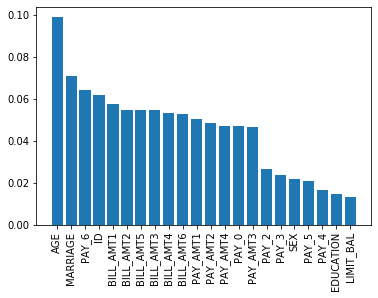

In [16]:
labels = np.array(df.columns.values)[sorted_importances]
plt.bar(x, importances[sorted_importances], tick_label=labels)
plt.xticks(rotation=90)
plt.show()